#### 1. **ML vs DL - Basic Classifier Example**

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [3]:
# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 1.0


#### 2. **Hyperparameters - Learning Rate in a Neural Network**

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8952 - loss: 0.3442 - val_accuracy: 0.9500 - val_loss: 0.1751
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9567 - loss: 0.1555 - val_accuracy: 0.9505 - val_loss: 0.2056
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9617 - loss: 0.1345 - val_accuracy: 0.9508 - val_loss: 0.2051


In [35]:
# Predict on a sample from the test set
sample_index = 0
sample_input = X_test[sample_index].reshape(1, 784)
predictions = model.predict(sample_input)
# The predictions are probabilities for each class.
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.9422025e-20, 5.3783623e-07, 1.9062291e-12, 2.1240470e-12,
        1.4720697e-13, 2.6175414e-19, 1.0846831e-20, 9.9999917e-01,
        1.2349532e-13, 2.5487586e-07]], dtype=float32)

In [36]:
# To get the predicted class, find the index with the highest probability.
predicted_class = np.argmax(predictions)

In [37]:
print(f"Predicted class for sample {sample_index}: {predicted_class}")
print(f"True class for sample {sample_index}: {y_test[sample_index]}")

Predicted class for sample 0: 7
True class for sample 0: 7


#### 3. **Loss Function Visualization**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

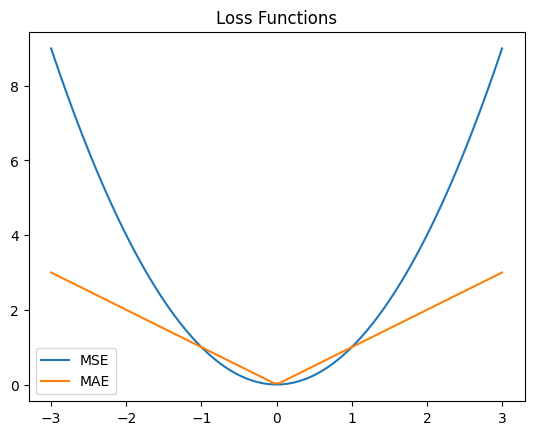

In [10]:
x = np.linspace(-3, 3, 100)
mse = x**2
mae = np.abs(x)
plt.plot(x, mse, label='MSE')
plt.plot(x, mae, label='MAE')
plt.legend()
plt.title("Loss Functions")
plt.show()

#### 4. **Data Augmentation (Image)**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [46]:
datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2, horizontal_flip=True)

In [47]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), _ = cifar10.load_data()
sample = x_train[0].reshape((1, 32, 32, 3))

In [48]:
aug_iter = datagen.flow(sample, batch_size=1)

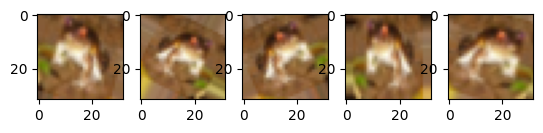

In [49]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(aug_iter.__next__()[0].astype('uint8'))
plt.show()

#### 5. **Activation Functions**

In [18]:
import numpy as np
import matplotlib.pyplot as plt

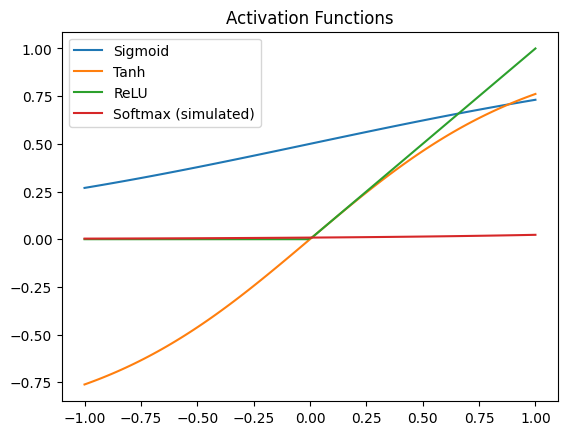

In [21]:
x = np.linspace(-1, 1, 100)
plt.plot(x, 1/(1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.plot(x, np.exp(x) / np.sum(np.exp(x)), label='Softmax (simulated)')
plt.legend()
plt.title("Activation Functions")
plt.show()